In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import scipy.stats as stats

%matplotlib inline

In [2]:
df = pd.read_csv('../data/train.csv')
df2 = pd.read_csv('../data/test.csv')

In [3]:
y = df[['SalePrice']]

In [4]:
# Resetting both train and test indexes to make kaggle submissions simpler
df.set_index('Id', inplace = True)

df2.set_index('Id', inplace = True)


In [5]:
df.drop(['PID', 'SalePrice'], axis = 1, inplace = True)

df2.drop('PID', axis = 1, inplace = True)

**Bringing in all data cleaning for both TRAIN and TEST CSVs from previous notebook**

**Applying TRAIN & TEST CSV Cleaning**

In [6]:
lot_frontage_mean = np.mean(df['Lot Frontage'])
df['Lot Frontage'] = df['Lot Frontage'].replace(np.nan, 0)

lot_frontage_mean2 = np.mean(df2['Lot Frontage'])
df2['Lot Frontage'] = df2['Lot Frontage'].replace(np.nan, 0)



df['Alley'] = df["Alley"].replace(np.nan, str('No Alley'))

df2['Alley'] = df2["Alley"].replace(np.nan, str('No Alley'))



df['Mas Vnr Type'] = df['Mas Vnr Type'].replace('None', 'No Masonry')
df['Mas Vnr Type'].replace(np.nan, 'No Masonry', inplace = True)
df['Mas Vnr Area'].replace(np.nan, 0, inplace = True)

df2['Mas Vnr Type'] = df2['Mas Vnr Type'].replace('None', 'No Masonry')
df2['Mas Vnr Type'].replace(np.nan, 'No Masonry', inplace = True)
df2['Mas Vnr Area'].replace(np.nan, 0, inplace = True)



df['Bsmt Qual'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
df2['Bsmt Qual'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)

df['Bsmt Cond'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
df2['Bsmt Cond'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)

df['Bsmt Exposure'].replace(np.nan, 'No', inplace = True)
df['Bsmt Exposure'].replace({'Av': 2,
                         'Gd': 3,
                         'Mn': 1,
                         'No': 0}, inplace = True)
df2['Bsmt Exposure'].replace(np.nan, 'No', inplace = True)
df2['Bsmt Exposure'].replace({'Av': 2,
                         'Gd': 3,
                         'Mn': 1,
                         'No': 0}, inplace = True)

df['BsmtFin Type 1'].replace({'GLQ': 6,
                             'ALQ': 5,
                             'BLQ': 4,
                             'Rec': 3,
                             'LwQ': 2,
                             'Unf': 1,
                             np.nan: 0}, inplace = True)
df2['BsmtFin Type 1'].replace({'GLQ': 6,
                             'ALQ': 5,
                             'BLQ': 4,
                             'Rec': 3,
                             'LwQ': 2,
                             'Unf': 1,
                             np.nan: 0}, inplace = True)

df['BsmtFin Type 2'].replace({'GLQ': 6,
                             'ALQ': 5,
                             'BLQ': 4,
                             'Rec': 3,
                             'LwQ': 2,
                             'Unf': 1,
                             np.nan: 0}, inplace = True)
df2['BsmtFin Type 2'].replace({'GLQ': 6,
                             'ALQ': 5,
                             'BLQ': 4,
                             'Rec': 3,
                             'LwQ': 2,
                             'Unf': 1,
                             np.nan: 0}, inplace = True)

df['BsmtFin SF 1'].replace(np.nan, 0, inplace = True)
df['BsmtFin SF 2'].replace(np.nan, 0, inplace = True)
df['Bsmt Unf SF'].replace(np.nan, 0, inplace = True)
df['Total Bsmt SF'].replace(np.nan, 0, inplace = True)
df['Bsmt Full Bath'].replace(np.nan, 0, inplace = True)
df['Bsmt Half Bath'].replace(np.nan, 0, inplace = True)

df2['BsmtFin SF 1'].replace(np.nan, 0, inplace = True)
df2['BsmtFin SF 2'].replace(np.nan, 0, inplace = True)
df2['Bsmt Unf SF'].replace(np.nan, 0, inplace = True)
df2['Total Bsmt SF'].replace(np.nan, 0, inplace = True)
df2['Bsmt Full Bath'].replace(np.nan, 0, inplace = True)
df2['Bsmt Half Bath'].replace(np.nan, 0, inplace = True)



df['Fireplace Qu'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
df2['Fireplace Qu'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)



df['Garage Type'].replace({'Attchd': 'Attached to home',
                          'Detchd': 'Detached from home',
                          'Builtin': 'Built in',
                          'Basment': 'Basement Garage',
                          '2Types': 'More than 1 type',
                          'CarPort': 'Car Port',
                          np.nan: 'No Garage'}, inplace = True)
df2['Garage Type'].replace({'Attchd': 'Attached to home',
                          'Detchd': 'Detached from home',
                          'Builtin': 'Built in',
                          'Basment': 'Basement Garage',
                          '2Types': 'More than 1 type',
                          'CarPort': 'Car Port',
                          np.nan: 'No Garage'}, inplace = True)

np.mean(df['Garage Yr Blt'])
# rounds to 1979
df['Garage Yr Blt'].replace(np.nan, 1979, inplace = True)
np.mean(df2['Garage Yr Blt'])
# rounds to 1977
df2['Garage Yr Blt'].replace(np.nan, 1977, inplace = True)

df['Garage Finish'].replace({'RFn': 2,
                            'Unf': 1,
                            'Fin': 3,
                            np.nan: 0}, inplace = True)
df2['Garage Finish'].replace({'RFn': 2,
                            'Unf': 1,
                            'Fin': 3,
                            np.nan: 0}, inplace = True)

df['Garage Cars'].replace(np.nan, 0, inplace = True)
df2['Garage Cars'].replace(np.nan, 0, inplace = True)

df['Garage Area'].replace(np.nan, 0, inplace = True)
df2['Garage Area'].replace(np.nan, 0, inplace = True)

df['Garage Qual'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
df2['Garage Qual'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)

df['Garage Cond'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)
df2['Garage Cond'].replace({'TA': 3,
                         'Gd': 4,
                         'Ex': 5,
                         'Fa': 2,
                         'Po': 1,
                         np.nan: 0}, inplace = True)



df['Pool QC'].replace({'TA': 2,
                         'Gd': 3,
                         'Ex': 4,
                         'Fa': 1,
                         np.nan: 0}, inplace = True)
df2['Pool QC'].replace({'TA': 2,
                         'Gd': 3,
                         'Ex': 4,
                         'Fa': 1,
                         np.nan: 0}, inplace = True)



df['Fence'].replace({'GdPrv': 'Good Privacy',
                    'MnPrv': 'Minimum Privacy',
                    'GdWo': 'Good Wood',
                    'MnWw': 'Minimum Wood/Wire',
                    np.nan: 'No Fence'}, inplace = True)
df2['Fence'].replace({'GdPrv': 'Good Privacy',
                    'MnPrv': 'Minimum Privacy',
                    'GdWo': 'Good Wood',
                    'MnWw': 'Minimum Wood/Wire',
                    np.nan: 'No Fence'}, inplace = True)



df['Misc Feature'].replace({np.nan: 'No Extras',
                           'Shed': 'Shed',
                           'TenC': 'Tennis Court',
                           'Gar2': '2nd Garage',
                           'Othr': 'Other',
                           'Elev': 'Elevator'}, inplace = True)
df2['Misc Feature'].replace({np.nan: 'No Extras',
                           'Shed': 'Shed',
                           'TenC': 'Tennis Court',
                           'Gar2': '2nd Garage',
                           'Othr': 'Other',
                           'Elev': 'Elevator'}, inplace = True)


df2['Electrical'].replace(np.nan, 'Mix', inplace = True)



df['Garage Yr Blt'].replace(2207, 2007, inplace = True)



cleaned_features = df[['Lot Frontage', 'Alley', 'Mas Vnr Area', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
   'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
   'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']]

cleaned_features2 = df2[['Lot Frontage', 'Alley', 'Mas Vnr Area', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
   'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
   'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature', 'Electrical']]


print(df.isnull().sum().sum())
print(df2.isnull().sum().sum())

0
0


In [7]:
df.shape

(2051, 78)

In [8]:
df2.shape

(879, 78)

In [9]:
numeric_cols = df._get_numeric_data()

In [10]:
numeric_cols2 = df2._get_numeric_data()

# Feature Engineering
### Dummy Variables
##### Same steps taken for both TRAIN and TEST dataframes

In [11]:
non_numeric_dummies = [pd.get_dummies(df[col],prefix=col) for col in df.columns if col not in numeric_cols]

In [12]:
# pd.set_option('display.max_columns', 1000)
dummies_df = pd.concat(non_numeric_dummies, sort = False, axis = 1)
dummies_df.head()

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Misc Feature_Tennis Court,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,
109,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
544,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
153,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
318,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
255,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
non_numeric_dummies2 = [pd.get_dummies(df2[col], prefix=col) for col in df2.columns if col not in numeric_cols2]

In [14]:
dummies_df2 = pd.concat(non_numeric_dummies2, sort = False, axis = 1)
dummies_df2.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,
2658,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2718,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2414,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1989,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
625,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


**Dummy dataframes are not matching so we need to get them to match.**

In [15]:
print(dummies_df.shape)
print(dummies_df2.shape)

(2051, 209)
(879, 197)


In [16]:
in_df = set(dummies_df.columns) - set(dummies_df2.columns)

in_df_2 = set(dummies_df2.columns) - set(dummies_df.columns)

# Put both dataframe columns into a set and see the differences between each column

In [17]:
for i in in_df:
    dummies_df2[i] = 0

for j in in_df_2:
    dummies_df[j] = 0
    
# Create for loops to put columns not in the each dataframe into each respective dataframe

In [18]:
dummies_df.shape

(2051, 218)

In [19]:
dummies_df2.shape

(879, 218)

### Polynomial Features 

In [20]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [21]:
df_new = df.join(dummies_df)

df_new2 = df2.join(dummies_df2)

# Creating new dataframes for both train and test csv which is a combination of each respective dataframe
# joined with its respective dummy columns

In [22]:
print(df_new.shape)
print(df_new2.shape)

# The shapes are off by one because of the 'SalePrice' column in train csv

(2051, 296)
(879, 296)


In [23]:
numeric = df_new._get_numeric_data()

numeric2 = df_new2._get_numeric_data()

In [24]:
# Instantiate X for both train and test csv
X = df_new._get_numeric_data()

X2 = df_new2._get_numeric_data()

In [25]:
# Fit 
X_poly = poly.fit_transform(X)

In [26]:
X_poly.shape

(2051, 34980)

In [27]:
# Create a new poly datafram
poly_col_names = poly.get_feature_names(X.columns)
new_poly_df = pd.DataFrame(X_poly, columns = poly_col_names)

new_poly_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Qual,Bsmt Cond,...,Sale Type_VWD Exterior 2nd_Other,Sale Type_VWD Roof Matl_Metal,Sale Type_VWD Roof Matl_Roll,Sale Type_VWD Heating_Floor,Exterior 2nd_Other Roof Matl_Metal,Exterior 2nd_Other Roof Matl_Roll,Exterior 2nd_Other Heating_Floor,Roof Matl_Metal Roof Matl_Roll,Roof Matl_Metal Heating_Floor,Roof Matl_Roll Heating_Floor
0,60.0,0.0,13517.0,6.0,8.0,1976.0,2005.0,289.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,43.0,11492.0,7.0,5.0,1996.0,1997.0,132.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,68.0,7922.0,5.0,7.0,1953.0,2007.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,73.0,9802.0,5.0,5.0,2006.0,2007.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,82.0,14235.0,6.0,8.0,1900.0,1993.0,0.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Same process for the test csv below as with the train csv**

In [28]:
X_poly2 = poly.fit_transform(X2)

In [29]:
X_poly2.shape

(879, 34980)

In [30]:
poly_col_names2 = poly.get_feature_names(X2.columns)
new_poly_df2 = pd.DataFrame(X_poly2, columns = poly_col_names2)

new_poly_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Qual,Bsmt Cond,...,Sale Type_VWD Exterior 2nd_Other,Sale Type_VWD Roof Matl_Metal,Sale Type_VWD Roof Matl_Roll,Sale Type_VWD Heating_Floor,Exterior 2nd_Other Roof Matl_Metal,Exterior 2nd_Other Roof Matl_Roll,Exterior 2nd_Other Heating_Floor,Roof Matl_Metal Roof Matl_Roll,Roof Matl_Metal Heating_Floor,Roof Matl_Roll Heating_Floor
0,60.0,0.0,13517.0,6.0,8.0,1976.0,2005.0,289.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,43.0,11492.0,7.0,5.0,1996.0,1997.0,132.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,68.0,7922.0,5.0,7.0,1953.0,2007.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,73.0,9802.0,5.0,5.0,2006.0,2007.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,82.0,14235.0,6.0,8.0,1900.0,1993.0,0.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get Train and Test CSV in the same order

In [31]:
sorted_cols = sorted(new_poly_df.columns)

In [32]:
new_poly_df = new_poly_df[sorted_cols]

In [33]:
new_poly_df.head()

,1st Flr SF,1st Flr SF 2nd Flr SF,1st Flr SF 3Ssn Porch,1st Flr SF Alley_Grvl,1st Flr SF Alley_No Alley,1st Flr SF Alley_Pave,1st Flr SF Bedroom AbvGr,1st Flr SF Bldg Type_1Fam,1st Flr SF Bldg Type_2fmCon,1st Flr SF Bldg Type_Duplex,...,Yr Sold Sale Type_ConLw,Yr Sold Sale Type_New,Yr Sold Sale Type_Oth,Yr Sold Sale Type_VWD,Yr Sold Sale Type_WD,Yr Sold Street_Grvl,Yr Sold Street_Pave,Yr Sold Utilities_AllPub,Yr Sold Utilities_NoSeWa,Yr Sold Utilities_NoSewr
0,725.0,546650.0,0.0,0.0,725.0,0.0,2175.0,725.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2010.0,0.0,2010.0,2010.0,0.0,0.0
1,913.0,1103817.0,0.0,0.0,913.0,0.0,3652.0,913.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2009.0,0.0,2009.0,2009.0,0.0,0.0
2,1057.0,0.0,0.0,0.0,1057.0,0.0,3171.0,1057.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2010.0,0.0,2010.0,2010.0,0.0,0.0
3,744.0,520800.0,0.0,0.0,744.0,0.0,2232.0,744.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2010.0,0.0,2010.0,2010.0,0.0,0.0
4,831.0,510234.0,0.0,0.0,831.0,0.0,2493.0,831.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2010.0,0.0,2010.0,2010.0,0.0,0.0


In [34]:
sorted_cols2 = sorted(new_poly_df2.columns)

In [35]:
new_poly_df2 = new_poly_df2[sorted_cols2]

In [36]:
new_poly_df2.head()

,1st Flr SF,1st Flr SF 2nd Flr SF,1st Flr SF 3Ssn Porch,1st Flr SF Alley_Grvl,1st Flr SF Alley_No Alley,1st Flr SF Alley_Pave,1st Flr SF Bedroom AbvGr,1st Flr SF Bldg Type_1Fam,1st Flr SF Bldg Type_2fmCon,1st Flr SF Bldg Type_Duplex,...,Yr Sold Sale Type_ConLw,Yr Sold Sale Type_New,Yr Sold Sale Type_Oth,Yr Sold Sale Type_VWD,Yr Sold Sale Type_WD,Yr Sold Street_Grvl,Yr Sold Street_Pave,Yr Sold Utilities_AllPub,Yr Sold Utilities_NoSeWa,Yr Sold Utilities_NoSewr
0,908.0,926160.0,0.0,908.0,0.0,0.0,3632.0,0.0,908.0,0.0,...,0.0,0.0,0.0,0.0,2006.0,0.0,2006.0,2006.0,0.0,0.0
1,1967.0,0.0,0.0,0.0,1967.0,0.0,11802.0,0.0,0.0,1967.0,...,0.0,0.0,0.0,0.0,2006.0,0.0,2006.0,2006.0,0.0,0.0
2,664.0,552448.0,0.0,0.0,664.0,0.0,1992.0,664.0,0.0,0.0,...,0.0,2006.0,0.0,0.0,0.0,0.0,2006.0,2006.0,0.0,0.0
3,968.0,0.0,0.0,0.0,968.0,0.0,1936.0,968.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2007.0,0.0,2007.0,2007.0,0.0,0.0
4,1394.0,0.0,0.0,0.0,1394.0,0.0,4182.0,1394.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2009.0,0.0,2009.0,2009.0,0.0,0.0


### Correlations

In [37]:
# Putting the original df['SalePrice'] column back into new_poly_df to see overall correlations
new_poly_df = new_poly_df.join(y)
new_poly_df.shape

(2051, 34981)

In [38]:
# Creating a dictionary with the correlations between 'SalePrice' and all polynomial features
corr = {}
for i in new_poly_df.columns:
    corr[i] = stats.pearsonr(new_poly_df[i], y['SalePrice'])[0]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [39]:
# Creating a new dataframe with all the correlations
# Index = dataframe column names, columns = 'correlations'
corr_df = pd.DataFrame.from_dict(corr, orient = 'index', columns = ['correlations'])
corr_df.head()

,correlations
1st Flr SF,0.618486
1st Flr SF 2nd Flr SF,0.363887
1st Flr SF 3Ssn Porch,0.061015
1st Flr SF Alley_Grvl,-0.142753
1st Flr SF Alley_No Alley,0.558839


In [40]:
# Creating a new column of absolute values of all of the correlations
# We don't care if the correlations are negative, we just want to see if the correlation is strong or not
corr_df['abs'] = np.abs(corr_df)
corr_df.head()

,correlations,abs
1st Flr SF,0.618486,0.618486
1st Flr SF 2nd Flr SF,0.363887,0.363887
1st Flr SF 3Ssn Porch,0.061015,0.061015
1st Flr SF Alley_Grvl,-0.142753,0.142753
1st Flr SF Alley_No Alley,0.558839,0.558839


## Creating a threshold for absolute value to see only those with a pearson correlation with absolute value less than .5 

**(Lower than the threshold in our original model)**

In [42]:
corr_df.sort_values('abs', ascending = False)[corr_df['abs'] > .3]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,correlations,abs
SalePrice,1.000000,1.000000
Overall Qual Gr Liv Area,0.837152,0.837152
Overall Qual Garage Cars,0.819935,0.819935
Bsmt Qual Gr Liv Area,0.814206,0.814206
Overall Qual Garage Area,0.813247,0.813247
Overall Qual Bsmt Qual,0.812202,0.812202
Overall Qual Year Built,0.806902,0.806902
Overall Qual Garage Yr Blt,0.805228,0.805228
Overall Qual Year Remod/Add,0.804740,0.804740
Overall Qual,0.800207,0.800207


In [43]:
# Reoriented corr_df to make all row values into column names
# These column names will now be used as features in our model
reorient_corr_df = (corr_df.sort_values('abs', ascending = False)[corr_df['abs'] > .4]).T

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


# Modeling

### Instantiate X and y

In [44]:
reorient_corr_df

,SalePrice,Overall Qual Gr Liv Area,Overall Qual Garage Cars,Bsmt Qual Gr Liv Area,Overall Qual Garage Area,Overall Qual Bsmt Qual,Overall Qual Year Built,Overall Qual Garage Yr Blt,Overall Qual Year Remod/Add,Overall Qual,...,Total Bsmt SF Roof Style_Hip,Mo Sold Heating QC_Ex,BsmtFin SF 1 Bsmt Full Bath,Bsmt Qual Bldg Type_1Fam,Full Bath Kitchen Qual_TA,BsmtFin SF 1 Kitchen AbvGr,Exterior 1st_VinylSd Exter Qual_Ex,Fireplace Qu Sale Type_New,Bsmt Exposure Condition 1_Norm,Total Bsmt SF Lot Shape_IR1
correlations,1.0,0.837152,0.819935,0.814206,0.813247,0.812202,0.806902,0.805228,0.80474,0.800207,...,0.401657,0.401306,0.401299,0.401245,-0.401088,0.400969,0.400943,0.400873,0.400645,0.400605
abs,1.0,0.837152,0.819935,0.814206,0.813247,0.812202,0.806902,0.805228,0.80474,0.800207,...,0.401657,0.401306,0.401299,0.401245,0.401088,0.400969,0.400943,0.400873,0.400645,0.400605


In [45]:
strong_corr = reorient_corr_df.columns.drop('SalePrice')
strong_corr_y = reorient_corr_df.columns[0]


X = new_poly_df[strong_corr]        # X contains all polynomial features that have an absolute value correlation 
                                    # values greater than .5, minus 'SalePrice' column
y = new_poly_df[['SalePrice']]      # y contains only 'SalePrice' column

In [46]:
X.head()

,Overall Qual Gr Liv Area,Overall Qual Garage Cars,Bsmt Qual Gr Liv Area,Overall Qual Garage Area,Overall Qual Bsmt Qual,Overall Qual Year Built,Overall Qual Garage Yr Blt,Overall Qual Year Remod/Add,Overall Qual,Overall Qual Yr Sold,...,Total Bsmt SF Roof Style_Hip,Mo Sold Heating QC_Ex,BsmtFin SF 1 Bsmt Full Bath,Bsmt Qual Bldg Type_1Fam,Full Bath Kitchen Qual_TA,BsmtFin SF 1 Kitchen AbvGr,Exterior 1st_VinylSd Exter Qual_Ex,Fireplace Qu Sale Type_New,Bsmt Exposure Condition 1_Norm,Total Bsmt SF Lot Shape_IR1
0,8874.0,12.0,4437.0,2850.0,18.0,11856.0,11856.0,12030.0,6.0,12060.0,...,0.0,3.0,0.0,3.0,0.0,533.0,0.0,0.0,0.0,725.0
1,14854.0,14.0,8488.0,3913.0,28.0,13972.0,13979.0,13979.0,7.0,14063.0,...,0.0,4.0,637.0,4.0,0.0,637.0,0.0,0.0,0.0,913.0
2,5285.0,5.0,3171.0,1230.0,15.0,9765.0,9765.0,10035.0,5.0,10050.0,...,0.0,0.0,731.0,3.0,0.0,731.0,0.0,0.0,0.0,0.0
3,7220.0,10.0,5776.0,2000.0,20.0,10030.0,10035.0,10035.0,5.0,10050.0,...,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8670.0,12.0,2890.0,2904.0,12.0,11400.0,11742.0,11958.0,6.0,12060.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,676.0


In [47]:
new_poly_df[['SalePrice']].head()

,SalePrice
0,130500
1,220000
2,109000
3,174000
4,138500


### train-test-split

In [48]:
# Setting a larger test size 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Scale

In [49]:
ss = StandardScaler()
ss.fit(X_train, y_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Lasso Regression

In [50]:
# Instantiate Lasso model
lasso = LassoCV(max_iter = 2500)

# Fit Lasso model
lasso.fit(X_train_sc, y_train)

# CV score
print(cross_val_score(lasso, X_train_sc, y_train, cv = 5).mean())

print('')

# Print Lasso score
print(lasso.score(X_test_sc, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

0.8348117950490744

0.9166789341442221


## Setting a larger correlation threshold very slighlty decreases the cross-val score, but slightly increases the strength of our model on the testing set

In [52]:
X_holdout = new_poly_df2[strong_corr]

X_holdout_sc = ss.transform(X_holdout)

X_holdout_preds = lasso.predict(X_holdout_sc)

X_holdout.loc[:, 'SalePrice'] = X_holdout_preds

X_holdout.loc[:, 'Id'] = df2.index

X_holdout_final = X_holdout[['Id', 'SalePrice']].set_index('Id')

X_holdout_final.to_csv('../all submissions/kaggle6')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [56]:
X_train_preds = lasso.predict(X_train_sc)

In [57]:
# Create a function to automate plotting process

def plot_predictions(model_name, y_train_pred, y_train_actual): 
    plt.scatter(y_train_pred, y_train_actual, c = "orange", marker = "s", label = "Train data")
    plt.title("Lasso Regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], c='red')
    plt.tight_layout()

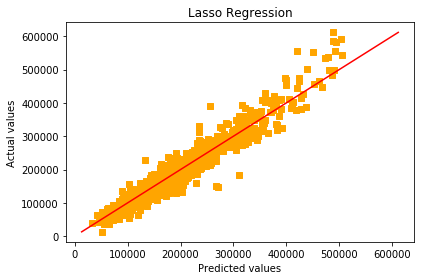

In [58]:
plot_predictions(lasso, X_train_preds, y_train)